In [1]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
logins = pd.read_json('D://Take Home Challenge//1//ultimate_challenge//logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


### Part 1 ‑ Exploratory data analysis

Question 1:Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

In [4]:
logins.set_index('login_time', inplace=True)
logins['count'] = 1
count_15_min = logins.resample('15T', how='sum')

C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


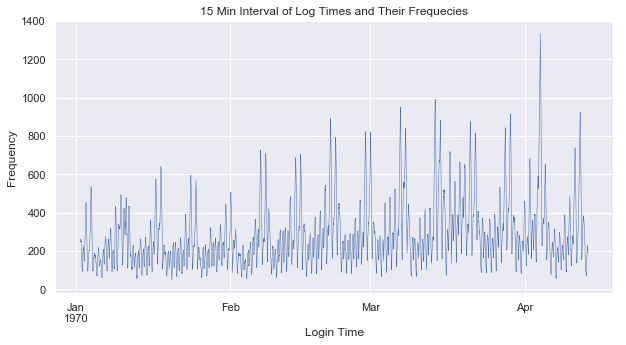

In [5]:
#Method 1
sns.set(style="darkgrid")
count_15_min.rolling(30, center=True).sum().plot(style=['-'],figsize=(10,5), legend=False,linewidth=0.5)
plt.xlabel('Login Time')
plt.ylabel('Frequency')
plt.title('15 Min Interval of Log Times and Their Frequecies')
plt.show()
# logins.resample('15T').sum() doesn't work. because it is "Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'"

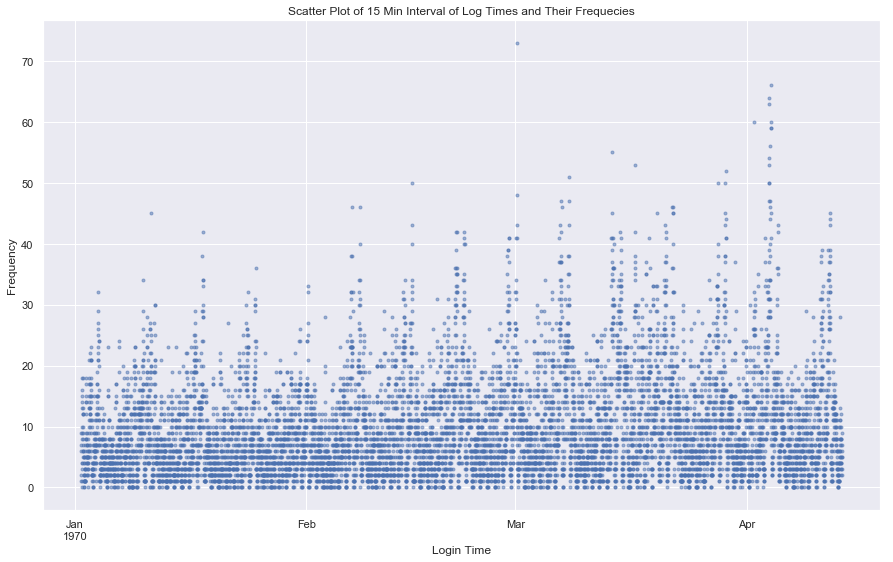

In [6]:
df = pd.DataFrame(count_15_min)
df.plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 9),legend=False)
plt.xlabel('Login Time')
plt.ylabel('Frequency')
plt.title('Scatter Plot of 15 Min Interval of Log Times and Their Frequecies')
plt.show()

Please report/illustrate important features of the demand, such as daily cycles.

Text(0.5, 1.0, 'Rolling Mean of Daily Purchase')

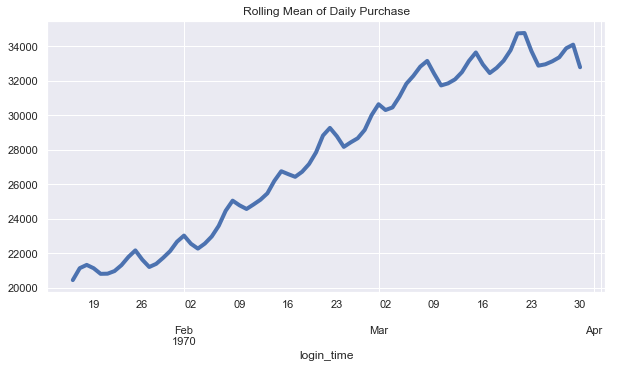

In [7]:
count_weekly = logins.resample('D').sum()
count_weekly.rolling(30, center=True).sum().plot(style=['-'],figsize=(10,5), legend=False,linewidth=4)
plt.title('Rolling Mean of Daily Purchase')

Text(0.5, 1.0, 'Daily Logs')

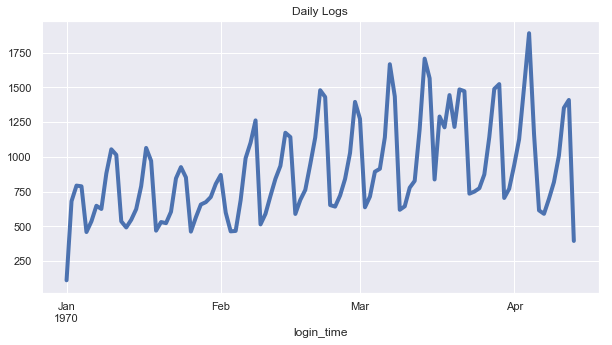

In [8]:
count_weekly = logins.resample('D').sum()
count_weekly.plot(style=['-'],figsize=(10,5), legend=False,linewidth=4)
plt.title('Daily Logs')

Text(0.5, 1.0, 'Weekly Logs')

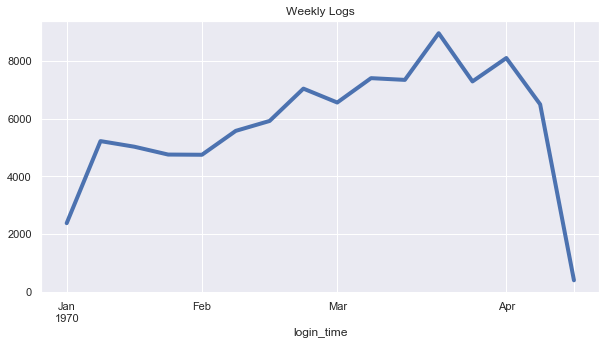

In [9]:
count_weekly = logins.resample('W').sum()
count_weekly.plot(style=['-'],figsize=(10,5), legend=False,linewidth=4)
plt.title('Weekly Logs')

As Known in above figures, daily trend has up and downs and variations. but also, weekly chart shows that in January, it has low level. but it has an upward trend. in middle of the March, it reaches to the highest point, and in April, it starts decreasing. at around end of April, the frequency of logins is zero.

If there are data quality issues, please report them.

Based on the figues, the only data quality issue is some outliers in the counts. so they can be investigated. also, it was better to have the logins of entire month of April, so it was possible to compare all 4 months better.

### Part 2 ‑ Experiment and metrics design

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

I'd choose mean or average as a key metric to evaluate the new approach to encourage drivers to be active in both cities. average number of cars can give a better estimate compared to any other metric to evaluate the active drivers in day or night of each one of the weekdays.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

a) we need to collect a data in a table which rows are days of the week with 2 columns (day and night). we record number of active drivers in each cell. then we calculate the average for each time frames to perfrom the test.
b) since this is 2 sample test, based on number of samples, we can either use 2 sample z-test or 2 sample t test. with larger number of samples (>30), we use z-test and with smaller samples, we use t test. for just one week, we use t-test. we make sure that we collect random and independent samples. 
c) we either reject H-null (which average cars in both cities are equal) or accept it. we can define a threshold level(alpha), which is normally 0.95. by using the P-value, we can accept or reject H-null. 

### Part 3 ‑ Predictive modeling

In [10]:
non_normal_json = json.load((open('D://Take Home Challenge//1//ultimate_challenge//ultimate_data_challenge.json')))

In [11]:
ultimate_df = json_normalize(non_normal_json)

In [12]:
ultimate_df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


1) Missing Values

In [13]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
# give average of 0 to nan values
ultimate_df.avg_rating_by_driver.replace(np.nan,0,inplace=True)
ultimate_df.avg_rating_by_driver.unique()

array([5. , 4.9, 4. , 3. , 4.8, 4.7, 4.5, 4.2, 0. , 4.4, 4.6, 3.7, 4.3,
       3.5, 2. , 3.8, 2.5, 4.1, 3.9, 1. , 3.3, 3.4, 3.6, 3.2, 2.3, 2.8,
       1.5, 2.7])

In [15]:
# give average of 0 to nan values
ultimate_df.avg_rating_of_driver.replace(np.nan,0,inplace=True)
ultimate_df.avg_rating_of_driver.unique()

array([4.7, 5. , 4.3, 4.6, 4.4, 3.5, 0. , 4.5, 4. , 3.9, 4.9, 4.8, 2.5,
       3.7, 1. , 4.1, 4.2, 3. , 3.8, 2. , 2.7, 3.3, 2.8, 3.6, 3.4, 3.2,
       2.6, 3.1, 2.9, 1.7, 1.8, 1.5, 2.3, 1.9, 2.1, 2.4, 1.6, 2.2])

In [16]:
# Replacing phones that are none with other (first change to string)
ultimate_df.phone = ultimate_df.phone.astype('str')
ultimate_df.replace('None','Other',inplace=True)
ultimate_df.phone.unique()

array(['iPhone', 'Android', 'Other'], dtype=object)

ultimate_df.describe()

In [17]:
# defining active users in preceding 30 days
ultimate_df['recent_date'] = pd.to_datetime(ultimate_df['last_trip_date'].sort_values().iloc[-1])
ultimate_df['current_date'] = pd.to_datetime(ultimate_df['last_trip_date'])
ultimate_df['difference'] = (ultimate_df['recent_date'] - ultimate_df['current_date']).dt.days
ultimate_df['Active'] = (ultimate_df['difference'] <= 30).astype(int)

In [18]:
ultimate_df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,recent_date,current_date,difference,Active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-07-01,2014-06-17,14,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-07-01,2014-05-05,57,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-07-01,2014-01-07,175,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-07-01,2014-06-29,2,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-07-01,2014-03-15,108,0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,2014-07-01,2014-06-06,25,1
6,3.95,4.0,0.0,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,2014-07-01,2014-01-25,157,0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,2014-07-01,2014-01-29,153,0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,2014-07-01,2014-02-01,150,0
9,2.37,5.0,0.0,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,2014-07-01,2014-01-05,177,0


1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [19]:
ultimate_df.groupby('Active')['Active'].count()

Active
0    31196
1    18804
Name: Active, dtype: int64

In [20]:
active = (ultimate_df['Active'] == 1).sum()
not_active = (ultimate_df['Active'] == 0).sum()
retention_rate = active/(active+not_active)
retention_rate

0.37608

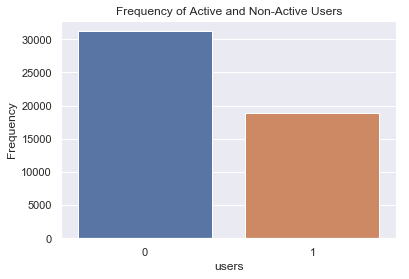

In [21]:
# countplot of active users
sns.set(style="darkgrid")
sns.countplot(x='Active', data=ultimate_df)
plt.title('Frequency of Active and Non-Active Users')
plt.xlabel('users')
plt.ylabel('Frequency')
plt.show()

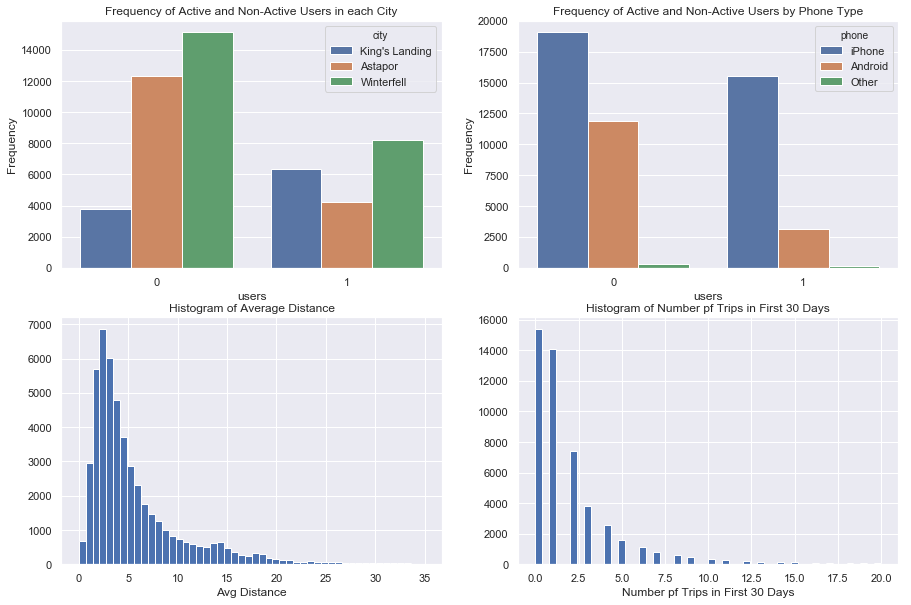

In [22]:
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x='Active', hue='city', data=ultimate_df)
plt.title('Frequency of Active and Non-Active Users in each City')
plt.xlabel('users')
plt.ylabel('Frequency')
plt.subplot(2,2,2)
sns.countplot(x='Active', hue='phone', data=ultimate_df)
plt.title('Frequency of Active and Non-Active Users by Phone Type')
plt.xlabel('users')
plt.ylabel('Frequency')
plt.subplot(2,2,3)
plt.hist(ultimate_df['avg_dist'],bins=50,range=(0.,35))
plt.title('Histogram of Average Distance')
plt.xlabel('Avg Distance')
plt.subplot(2,2,4)
plt.hist(ultimate_df['trips_in_first_30_days'],bins=50,range=(0,20))
plt.title('Histogram of Number pf Trips in First 30 Days')
plt.xlabel('Number pf Trips in First 30 Days')
plt.show()

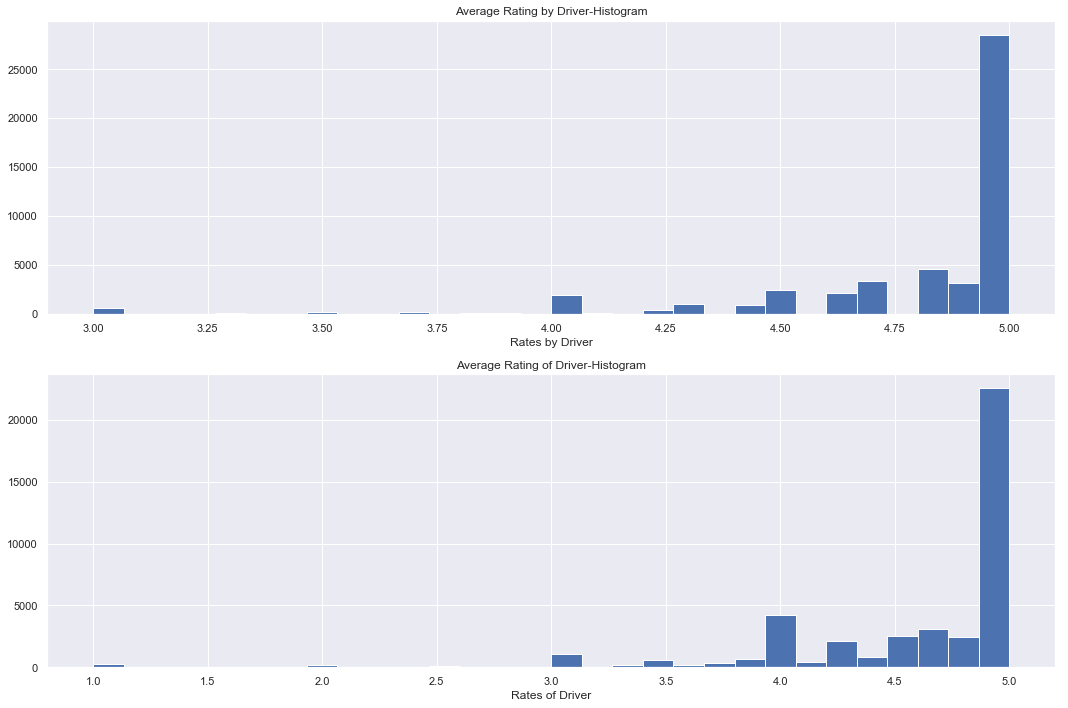

In [23]:
plt.subplots(figsize=(15,10))
plt.subplot(2,1,1)
plt.hist(ultimate_df['avg_rating_by_driver'],bins=30,range=(3,5))
plt.title('Average Rating by Driver-Histogram')
plt.xlabel('Rates by Driver')
plt.subplot(2,1,2)
plt.hist(ultimate_df['avg_rating_of_driver'],bins=30,range=(1,5))
plt.title('Average Rating of Driver-Histogram')
plt.xlabel('Rates of Driver')
plt.tight_layout()
plt.show()

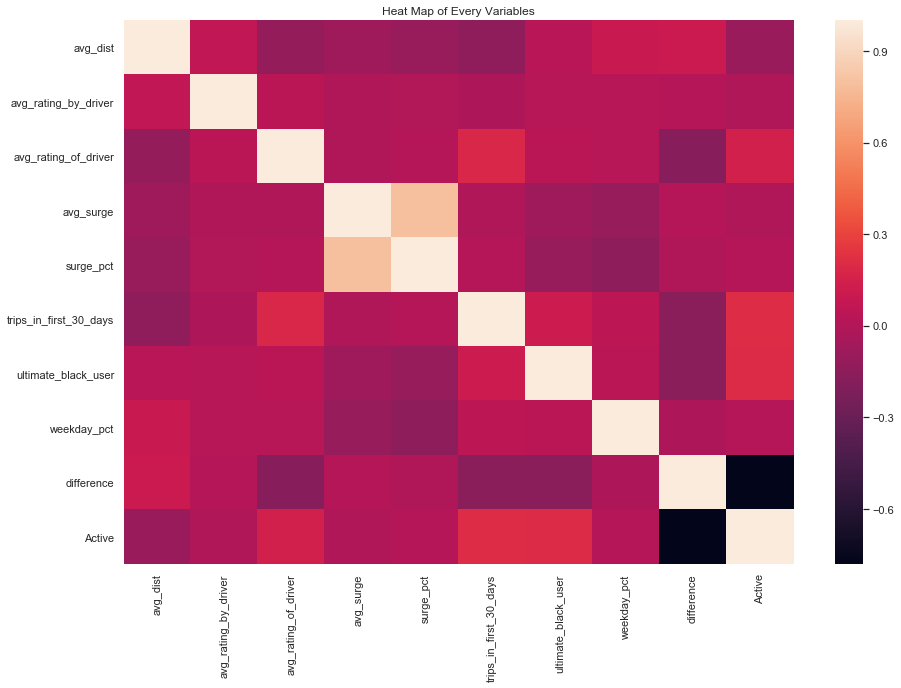

In [24]:
plt.subplots(figsize=(15,10))
numerical_cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver','avg_surge','city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct','trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct','recent_date', 'current_date', 'difference', 'Active']
corr = ultimate_df[numerical_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heat Map of Every Variables')
plt.show()


##### Conclusion

1) Number of users in city of winterfell is higher (either active or non-active users).

2) Almost 40% of users are still active.

3) Majority of active or non-active users logged in by iphone.

4) Average distance histogram shows screwed to left, so majority of users took an average 0-5 miles trips.

5) Number of trips in first 30 days is often between 0-5.

6) The final Histograms show the ratings by drivers and of drivers and its distribution.

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?

In [25]:
# Dropping unnecessory columns that created for calculations
ultimate_df = ultimate_df.drop(['recent_date','current_date','difference'],axis=1)

In [26]:
# Fix the Categories
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])
ultimate_df['signup_date'] = ultimate_df['signup_date'].values.astype(float)
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])
ultimate_df['last_trip_date'] = ultimate_df['last_trip_date'].values.astype(float)

In [27]:
# Logistic Regression
X = ultimate_df.drop(columns = ['Active','city','phone','signup_date','last_trip_date'], axis=1).values
y = ultimate_df['Active'].values
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
model = LogisticRegression()
# Fit the model on the trainng data.
model.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('Logistic Regression Results')
print('-------------------------------------------------')
print('score of Actual and Predicted',accuracy_score(model.predict(X_test), y_test))
print('score-Training: {}'.format(model.score(X_train,y_train)))
print('score: {}'.format(model.score(X_test,y_test)))
from sklearn import metrics 
print('RMSE-Train:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(X_train))))
print('RMSE-Test:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))

C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Results
-------------------------------------------------
score of Actual and Predicted 0.6714
score-Training: 0.6747428571428571
score: 0.6714
RMSE-Train: 0.5703131971620005
RMSE-Test: 0.5732364259186605


In [28]:
# K-Nearest Neighbor (KNN)
X = ultimate_df.drop(columns = ['Active','city','phone','signup_date','last_trip_date'], axis=1).values
y = ultimate_df['Active'].values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('KNN Results')
print('-------------------------------------')
print('KNN Score:',knn.score(X_test, y_test))
print('RMSE-Train:', np.sqrt(metrics.mean_squared_error(y_train, knn.predict(X_train))))
print('RMSE-Test:', np.sqrt(metrics.mean_squared_error(y_test, knn.predict(X_test))))

KNN Results
-------------------------------------
KNN Score: 0.7
RMSE-Train: 0.4097385926242661
RMSE-Test: 0.5477225575051661


In [29]:
# Decision Tree
X = ultimate_df.drop(columns = ['Active','city','phone','signup_date','last_trip_date'], axis=1).values
y = ultimate_df['Active'].values
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
#from sklearn.pipeline import Pipeline
#steps = [('scaler', StandardScaler()),('knn', tree.DecisionTreeClassifier())]
#pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
param_grid = {'max_depth': [1,3,5,7,9]}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
model = tree.fit(X_train,y_train)
print('Decision Tree Results')
print('-------------------------------------------')
print('Accuracy of Actual and Predicted',accuracy_score(model.predict(X_test), y_test))
print('score with scalling-Training: {}'.format(model.score(X_train,y_train)))
print('score with Scaling-Test: {}'.format(model.score(X_test,y_test)))
print('-------------------------------------------')
from sklearn import metrics 
print('RMSE-Train:', np.sqrt(metrics.mean_squared_error(y_train, tree.predict(X_train))))
print('RMSE-Test:', np.sqrt(metrics.mean_squared_error(y_test, tree.predict(X_test))))

C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Decision Tree Results
-------------------------------------------
Accuracy of Actual and Predicted 0.7402
score with scalling-Training: 0.7528571428571429
score with Scaling-Test: 0.7402
-------------------------------------------
RMSE-Train: 0.4971346468944376
RMSE-Test: 0.5097057974949863


In [30]:
# Random Forest
X = ultimate_df.drop(columns = ['Active','city','phone','signup_date','last_trip_date'], axis=1).values
y = ultimate_df['Active'].values
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
param_grid = {'n_estimators':[1,3,10,30,100,150,300],'max_depth':[1,3,5,7,9]}
#sc = StandardScaler()  
#X_train = sc.fit_transform(X_train)  
#X_test = sc.transform(X_test)
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3,scoring='neg_mean_squared_error')
model = grid_search.fit(X_train, y_train)  
y_pred = grid_search.predict(X_test)
from sklearn import metrics
print('Random Forest Results')
print('-------------------------------')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('-----------------------------')
#print('score with Scaling-Training: {}'.format(model.score(X_train.round(),y_train.round())))
#print('score with Scaling-Test: {}'.format(model.score(X_test.round(),y_test.round())))
print('-----------------------------')
print('RMSE-Train:', np.sqrt(metrics.mean_squared_error(y_train, grid_search.predict(X_train))))
print('RMSE-Test:', np.sqrt(metrics.mean_squared_error(y_test, grid_search.predict(X_test))))

Random Forest Results
-------------------------------
Mean Absolute Error: 0.33847912247973394
Mean Squared Error: 0.170489269804374
Root Mean Squared Error: 0.4129034630568918
-----------------------------
RMSE-Train: 0.3888958612672723
RMSE-Test: 0.4129034630568918


##### Conclusion

Since we want to decide if the user is active or non-active, this is a supervised machine learning and classification problem. we used Logistic Regression, K-Nearest Neighbor, Decison Tree and Random Forest methods. Random Forest model created the best results. to check the validity of the models, we calculated RMSE for each training and test. since the values of RMSE are close to each other in training and test groups (except KNN model), they are valid models and we don't see any overfitting or underfitting problem. In KNN, RMSE of both models have a somehow big difference, so there is a chance that it is overfitted.
Finally, following table summerizes the results.

Method | Features | Parameters | Training RMSE | Test RMSE
:---|:---|:---|:---|:---
Logistic Regression | avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct | Test % = 30, Random State = 42 |  0.5703 | 0.5732 
K-Nearest Neighbor | avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct | Test % = 30, Random State = 42 |  0.4097 | 0.5477
Decision Tree  | avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct | Test % = 30, Random State = 42 | 0.4971 | 0.5097 
Random Forest  | avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct | Test % = 30, Random State = 42 | 0.3889 | 0.4129


3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

The models can give a good insights about the users. based on this models, ulimate can predict which users will be active in long term, which can be determined by having the features in the model. the input features for new users can help to predict "Active" parameter. so by knowing that, they can investigate on those users and offer better options for them instead of investigating energy and budget to all users.